In [1]:
import re
import csv
import os
import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud


In [3]:
with open(r'C:/Users/user/Desktop/hansol/3rd_project/NLP_project/completed.csv', newline='', encoding='utf-8') as file:
    csv_reader = csv.reader(file)
    data_part_3 = list(csv_reader)
    print(data_part_3)

[['[Living Together] When I was in college, I practiced warmth while working as a part-timer in elections. When the work didn\'t end even after 3 a.m. due to the delay in counting the votes at the time of the part-time job, most of the students went back home using class as an excuse. I also had to go back home for an afternoon class, but the election watchdog staff caught my eye. I thought that if all the part-timers left, the rest of us would be many times more difficult, so I decided to stay together until the end. I fell asleep to the work that lasted all night, but each time, I went to the bathroom and washed my face with cold water, chasing after my drowsiness. After 9 p.m., everything was over, and I was served a bowl of warm rice soup with thank you from the person in charge. It was an experience where I was more physically challenged than others, but I was full of pride in being grateful to someone. I will be a new employee who actively practices followership even with Dow Tec

In [4]:
lines = ' '.join([' '.join(row) for row in data_part_3]) 
words = nltk.word_tokenize(lines) # 단어 단위로 나눔
print(words)

['[', 'Living', 'Together', ']', 'When', 'I', 'was', 'in', 'college', ',', 'I', 'practiced', 'warmth', 'while', 'working', 'as', 'a', 'part-timer', 'in', 'elections', '.', 'When', 'the', 'work', 'did', "n't", 'end', 'even', 'after', '3', 'a.m.', 'due', 'to', 'the', 'delay', 'in', 'counting', 'the', 'votes', 'at', 'the', 'time', 'of', 'the', 'part-time', 'job', ',', 'most', 'of', 'the', 'students', 'went', 'back', 'home', 'using', 'class', 'as', 'an', 'excuse', '.', 'I', 'also', 'had', 'to', 'go', 'back', 'home', 'for', 'an', 'afternoon', 'class', ',', 'but', 'the', 'election', 'watchdog', 'staff', 'caught', 'my', 'eye', '.', 'I', 'thought', 'that', 'if', 'all', 'the', 'part-timers', 'left', ',', 'the', 'rest', 'of', 'us', 'would', 'be', 'many', 'times', 'more', 'difficult', ',', 'so', 'I', 'decided', 'to', 'stay', 'together', 'until', 'the', 'end', '.', 'I', 'fell', 'asleep', 'to', 'the', 'work', 'that', 'lasted', 'all', 'night', ',', 'but', 'each', 'time', ',', 'I', 'went', 'to', 'the

In [5]:
import collections
import matplotlib.pyplot as plt

In [6]:
cnts = collections.Counter(words)
for val, count in cnts.items() :
    print(f'{val} : {count}')

[ : 41
Living : 2
Together : 4
] : 41
When : 90
I : 3002
was : 1037
in : 1256
college : 74
, : 3973
practiced : 11
warmth : 1
while : 132
working : 128
as : 512
a : 1762
part-timer : 3
elections : 1
. : 2906
the : 4008
work : 254
did : 93
n't : 87
end : 47
even : 53
after : 108
3 : 20
a.m. : 2
due : 46
to : 2478
delay : 2
counting : 1
votes : 1
at : 239
time : 255
of : 1717
part-time : 16
job : 105
most : 65
students : 76
went : 33
back : 17
home : 18
using : 146
class : 68
an : 369
excuse : 1
also : 120
had : 175
go : 22
for : 576
afternoon : 1
but : 235
election : 1
watchdog : 1
staff : 4
caught : 4
my : 784
eye : 5
thought : 111
that : 953
if : 93
all : 97
part-timers : 1
left : 13
rest : 5
us : 9
would : 65
be : 254
many : 83
times : 19
more : 144
difficult : 62
so : 203
decided : 46
stay : 5
together : 50
until : 35
fell : 6
asleep : 4
lasted : 1
night : 11
each : 78
bathroom : 1
and : 2668
washed : 1
face : 20
with : 579
cold : 1
water : 2
chasing : 1
drowsiness : 1
After : 93
9 

In [7]:
df = pd.DataFrame(cnts.items(), columns=['val', 'count'])
df_interested = df[df['count'] > 10]
df_sorted = df_interested.sort_values(by='count', ascending=False)

df_sorted

,val,count
19,the,4008
9,",",3973
5,I,3002
18,.,2906
84,and,2668
...,...,...
2511,wrote,11
2483,establish,11
256,smoothly,11
1892,persistence,11


In [8]:
n_min = 2                                                           # 최소 단어 길이. 
corpus = []
for a_line in words:
    pre = re.sub(r'\W', ' ', a_line)                                # 특수문자 제외.
    pre = re.sub(r'_', ' ', pre)                                    # 특수문자 제외.
    pre = re.sub(r'\d+','', pre)                                    # 숫자 제외. 
    pre = nltk.word_tokenize(pre)
    pre = [x for x in pre if len(x) > n_min]                        # 최소 길이 충족.
    pre = [x.lower() for x in pre]                                  # 소문자화.  정규화 (Normalization).
    pre = [x for x in pre if x not in stopwords.words('english')+['could']]   # 불용어 처리.
    corpus += pre                                                   # 단어를 말뭉치에 추가.

In [10]:
# Series 로 변환.
my_series = pd.Series(corpus)

# 도수 분포표. Top 10
my_word_counts = my_series.value_counts().sort_values(ascending=False)
my_word_counts[:10]

time           279
able           268
project        268
data           264
work           260
team           256
development    253
experience     222
company        191
think          183
dtype: int64

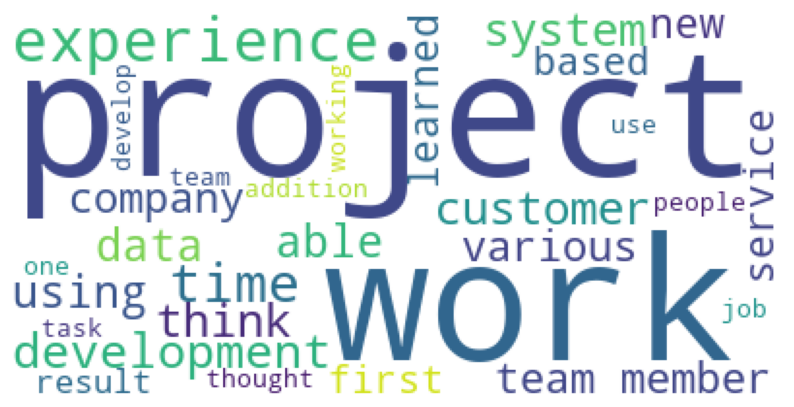

In [13]:
my_dict = dict(my_word_counts)

a_long_sentence = ' '.join(corpus)
wc = WordCloud(background_color='white', max_words=30)
wc.generate(a_long_sentence)


plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis("off")
plt.show()